# How do results change with population variations

In [1]:
import cogsworth
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import gala.dynamics as gd

In [2]:
import sys
sys.path.append("../src")
import plotting

In [3]:
import h5py as h5

In [4]:
%config InlineBackend.figure_format = 'retina'

pd.options.display.max_columns = 999

plt.rc('font', family='serif')
plt.rcParams['text.usetex'] = False
fs = 24

# update various fontsizes to match
params = {'figure.figsize': (12, 8),
          'legend.fontsize': fs,
          'axes.labelsize': fs,
          'xtick.labelsize': 0.9 * fs,
          'ytick.labelsize': 0.9 * fs,
          'axes.linewidth': 1.1,
          'xtick.major.size': 7,
          'xtick.minor.size': 4,
          'ytick.major.size': 7,
          'ytick.minor.size': 4}
plt.rcParams.update(params)

In [125]:
from importlib import reload
reload(plotting)

<module 'plotting' from '/mnt/home/twagg/supernova-feedback/notebooks/../src/plotting.py'>

# Binary physics variations

In [128]:
pop_details = {
    "file_names": ["fiducial", "ce-0.1", "ce-10.0", "beta-0.0", "beta-0.5", "beta-1.0", "ecsn-265", "no-fallback"],
    "labels": ["Fiducial", r"$\alpha_{\rm CE} = 0.1$", r"$\alpha_{\rm CE} = 10.0$", r"$\beta = 0.0$", r"$\beta = 0.5$",
               r"$\beta = 1.0$", r"$\sigma_{\rm low} = $" + "\n" + r"$265 \, {\rm km/s}$", "No fallback"],
}

In [14]:
%%time
pops = {file_name: cogsworth.pop.load(f"/mnt/home/twagg/ceph/pops/feedback-variations/{file_name}.h5", parts=[])
        for file_name in pop_details["file_names"]}

CPU times: user 5.13 s, sys: 15.6 ms, total: 5.14 s
Wall time: 6.54 s


In [40]:
for p in pops:
    plotting.set_sn_subpop_masks(pops[p]);
    pops[p]._bpp = pd.read_hdf(f"/mnt/home/twagg/ceph/pops/feedback-variations/{p}.h5", key="bpp")

1232 17382 11243 21970
1232 14639 9369 19656
1232 16744 10153 25143
1232 16979 9892 13111
1232 17656 11367 16631
1232 17424 11557 23097
1232 17383 11658 21970
1290 17395 11705 23097


In [18]:
for p in pops:
    f = np.load(f"/mnt/home/twagg/ceph/pops/feedback-variations/sn_positions-{p}.npz")
    pops[p].primary_sn_distances, pops[p].secondary_sn_distances = f["arr_0"] * u.kpc, f["arr_1"] * u.kpc

In [16]:
def merger_sn_fraction(p):
    return (p.sn_1_merger.sum() + p.sn_2_merger.sum()) / (p.sn_1_merger.sum() + p.sn_2_merger.sum() + p.sn_1.sum() + p.sn_2.sum() + p.sn_1_singles.sum() + p.sn_2_singles.sum())

In [17]:
for p in pops:
    print(merger_sn_fraction(pops[p]))

0.42391031701622706
0.4378118317890235
0.4719740201231416
0.31812005629155143
0.35471142771829545
0.43325830050647157
0.4205348084910897
0.43182455549946713


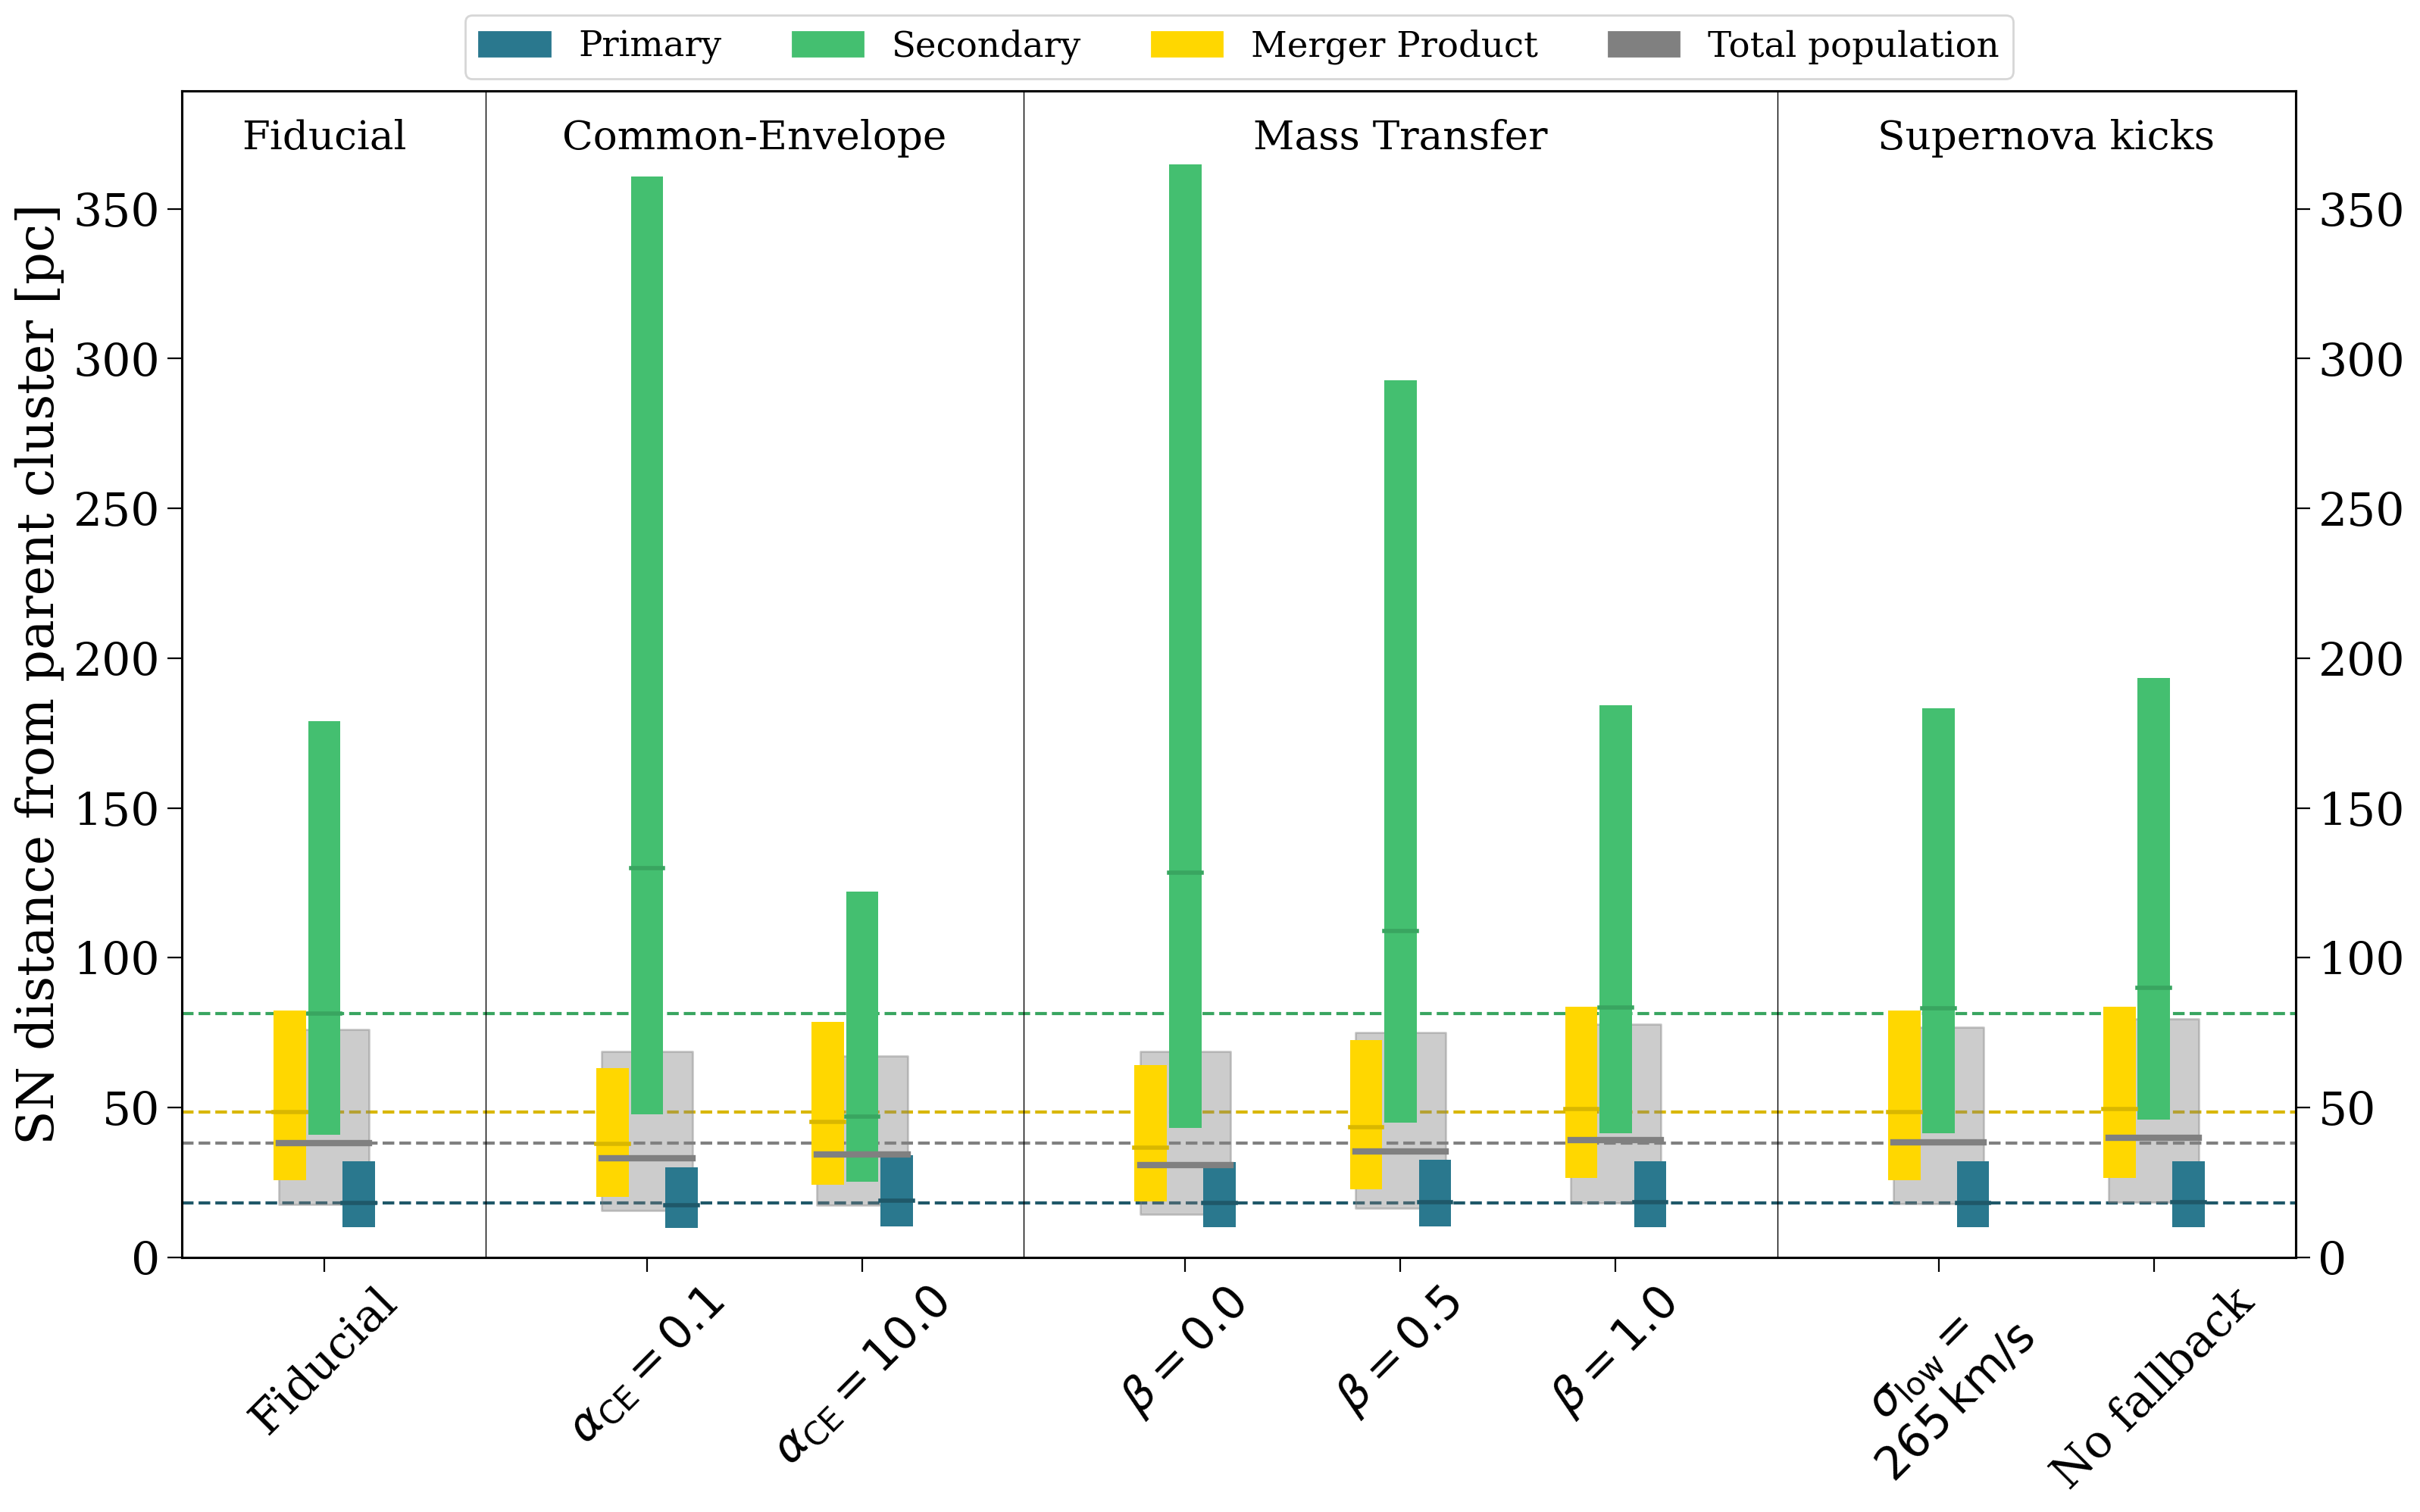

(<Figure size 1800x1000 with 2 Axes>,
 <Axes: ylabel='SN distance from parent cluster [pc]'>)

In [130]:
plotting.compare_variations(pops, pop_labels=pop_details["labels"])

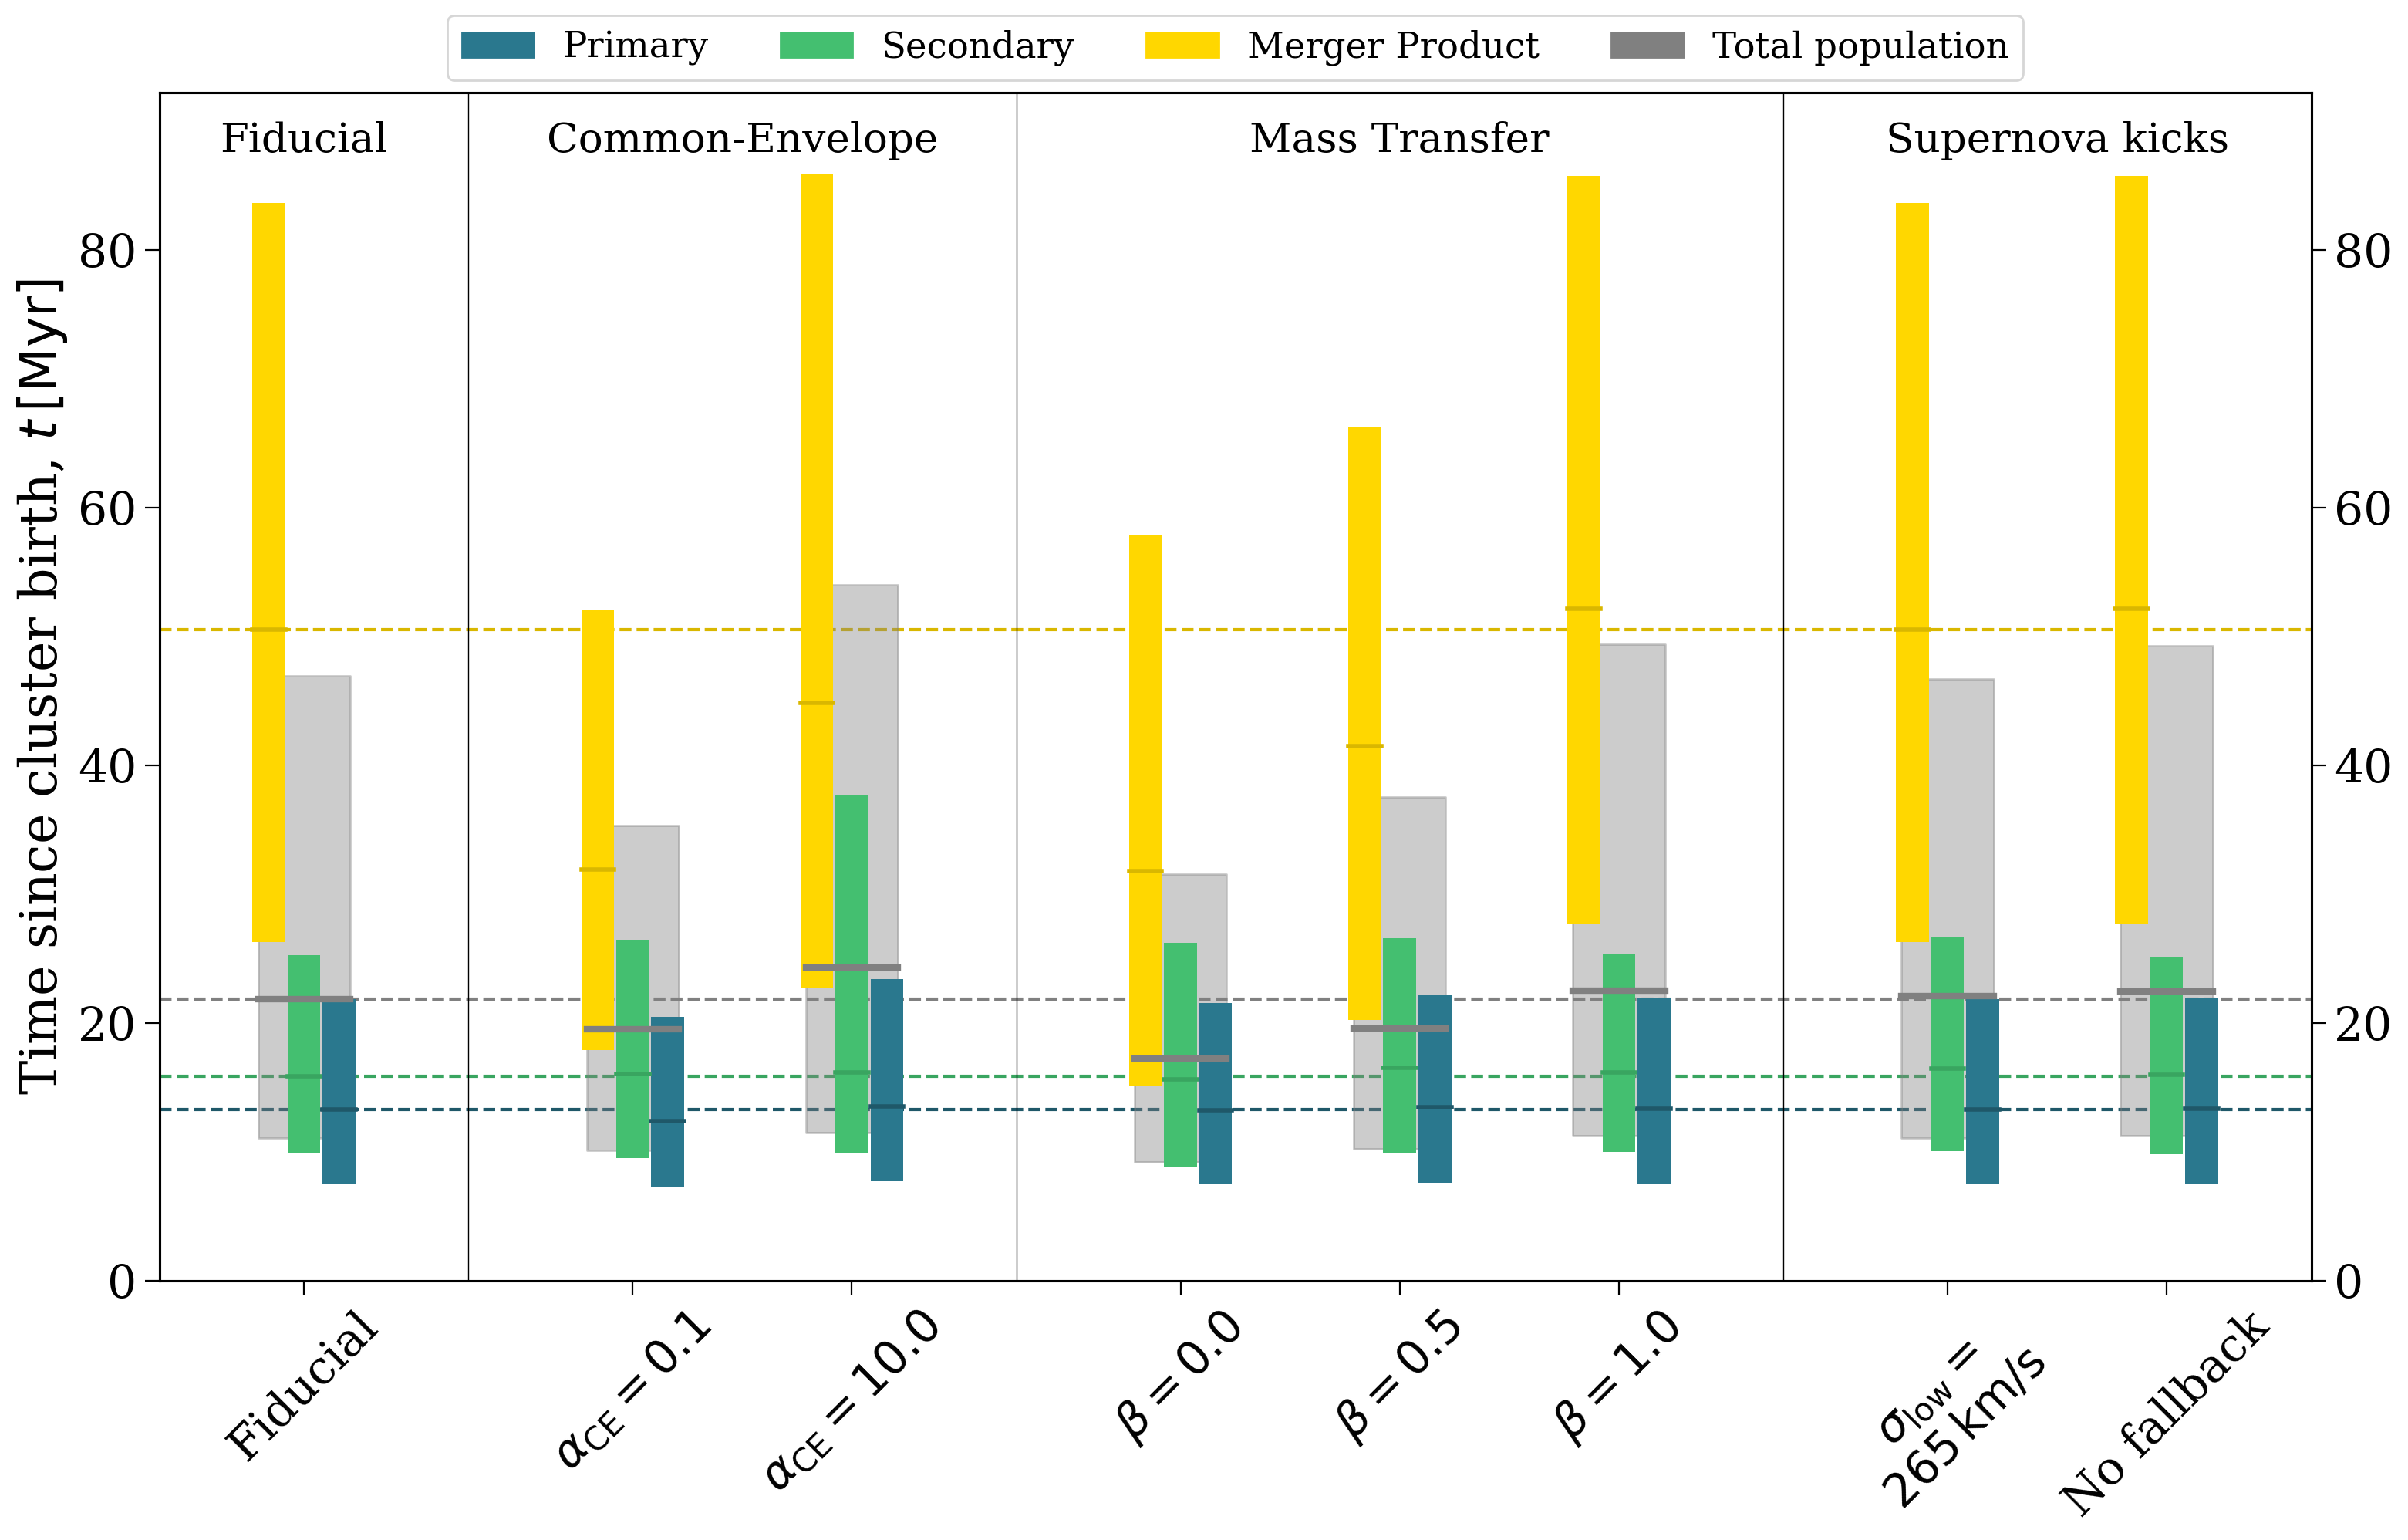

(<Figure size 1800x1000 with 2 Axes>,
 <Axes: ylabel='Time since cluster birth, $t \\, [\\rm Myr]$'>)

In [133]:
plotting.compare_variations(pops, pop_labels=pop_details["labels"], quantity="time", annotate_loc=90)

## Detailed plots

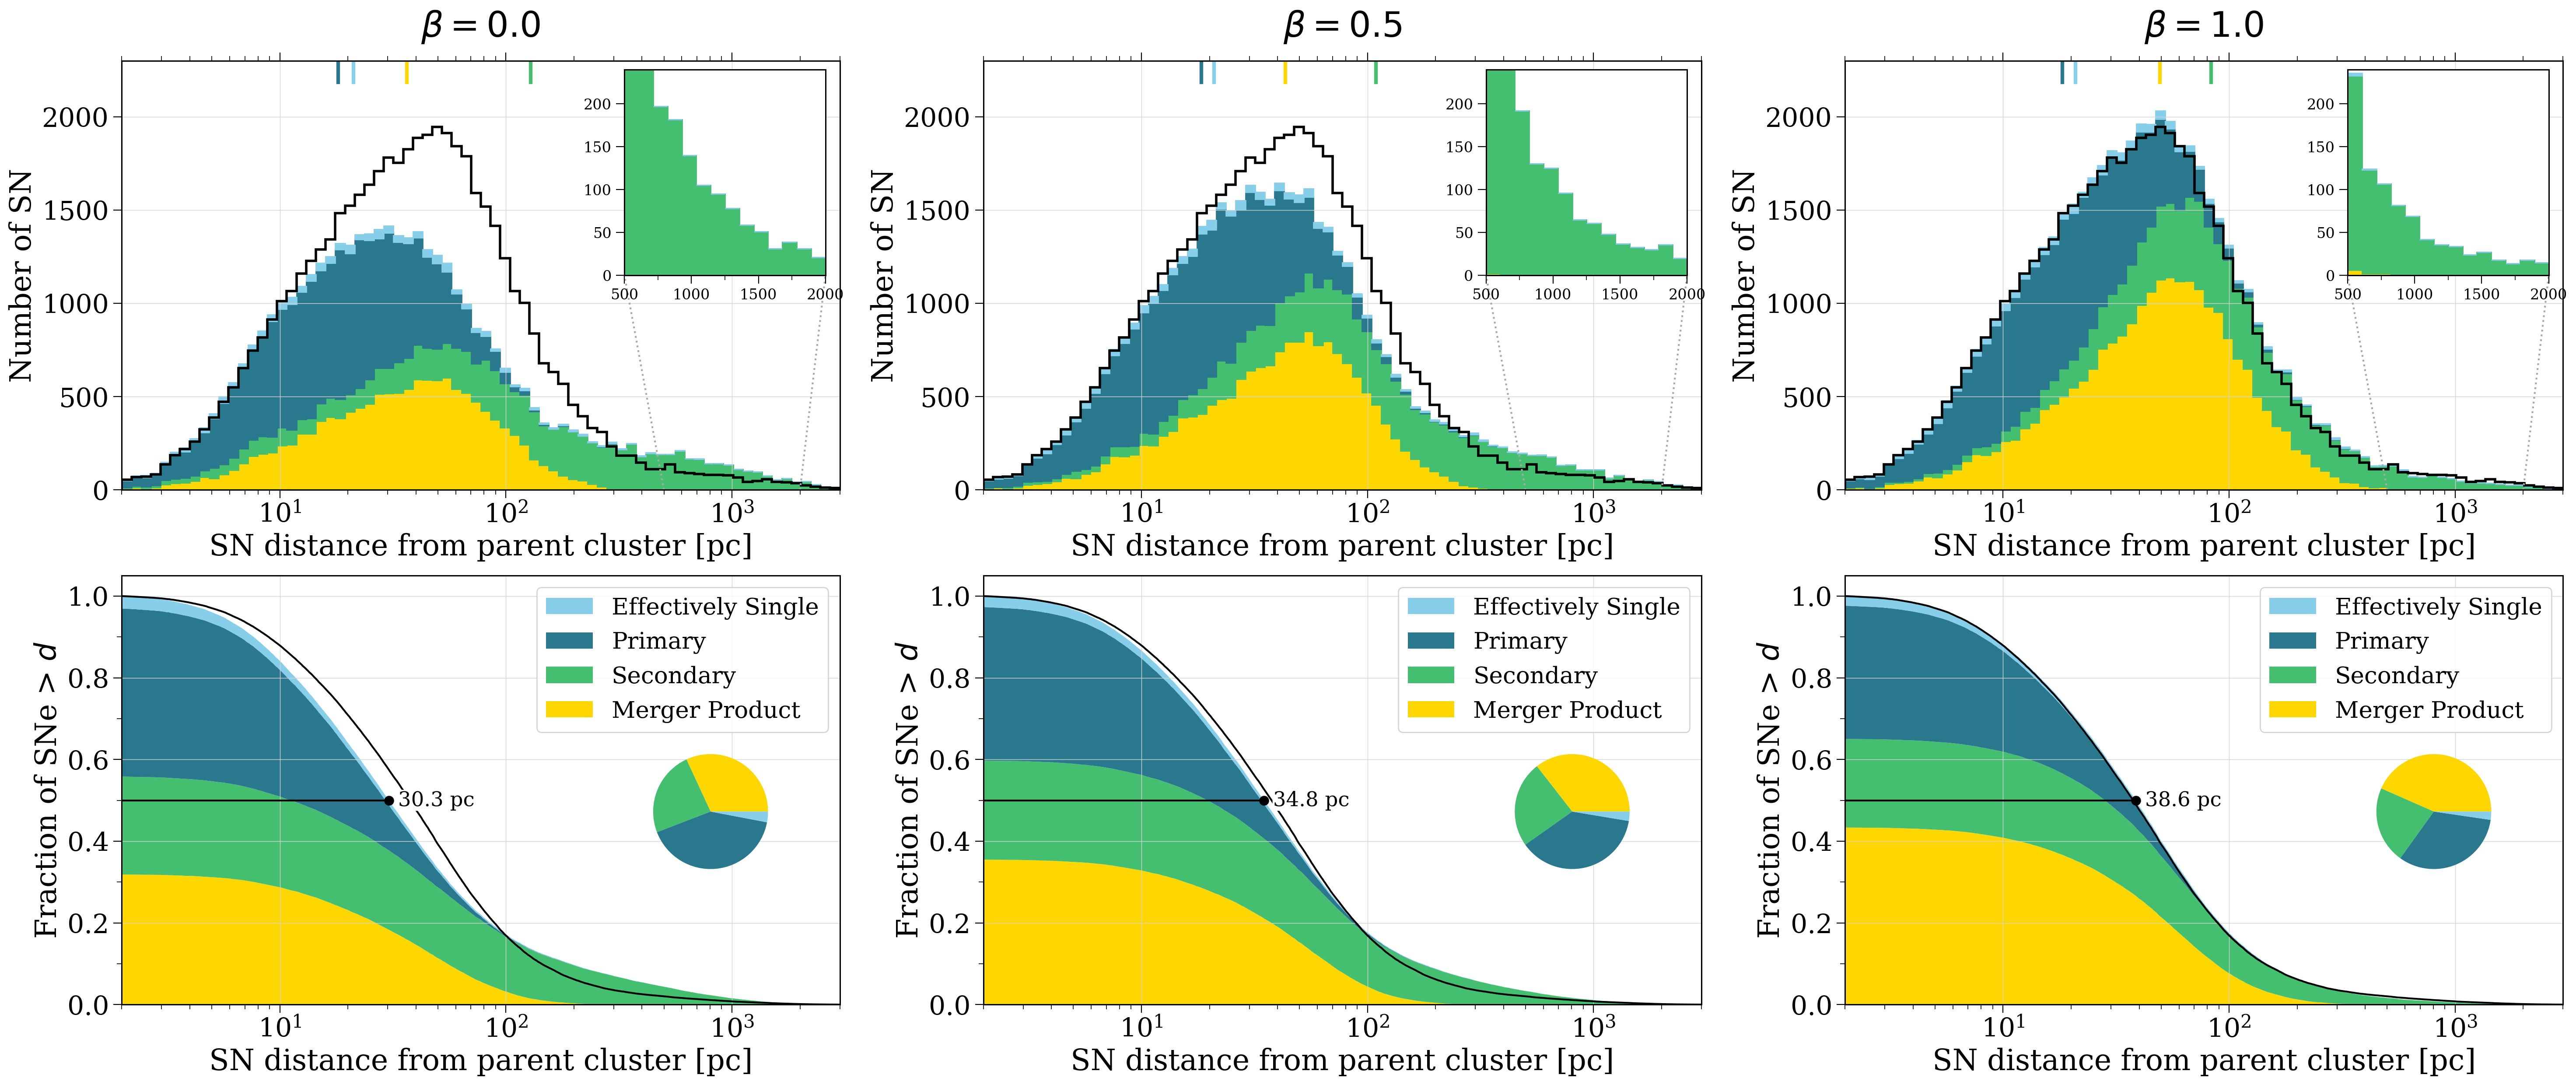

In [134]:
reload(plotting)
fig, axes = plt.subplots(2, 3, figsize=(36, 14))

for p, x, l in zip(["beta-0.0", "beta-0.5", "beta-1.0"],
                   [axes[:, 0], axes[:, 1], axes[:, 2]],
                   [r"$\beta = 0.0$", r"$\beta = 0.5$", r"$\beta = 1.0$"]):
    plotting.sandpile(pops[p], bins=np.geomspace(2e0, 3e3, 75),
                      comparison_pop=pops["fiducial"],
                      top_ax_dict={"ylim": (0, 2300)},
                      inset_ax_dict={"ylim": (0, 240)}, fig=fig, axes=x, show=False)
    x[0].set_title(l, fontsize=1.2 * fs, pad=20)
plt.show()

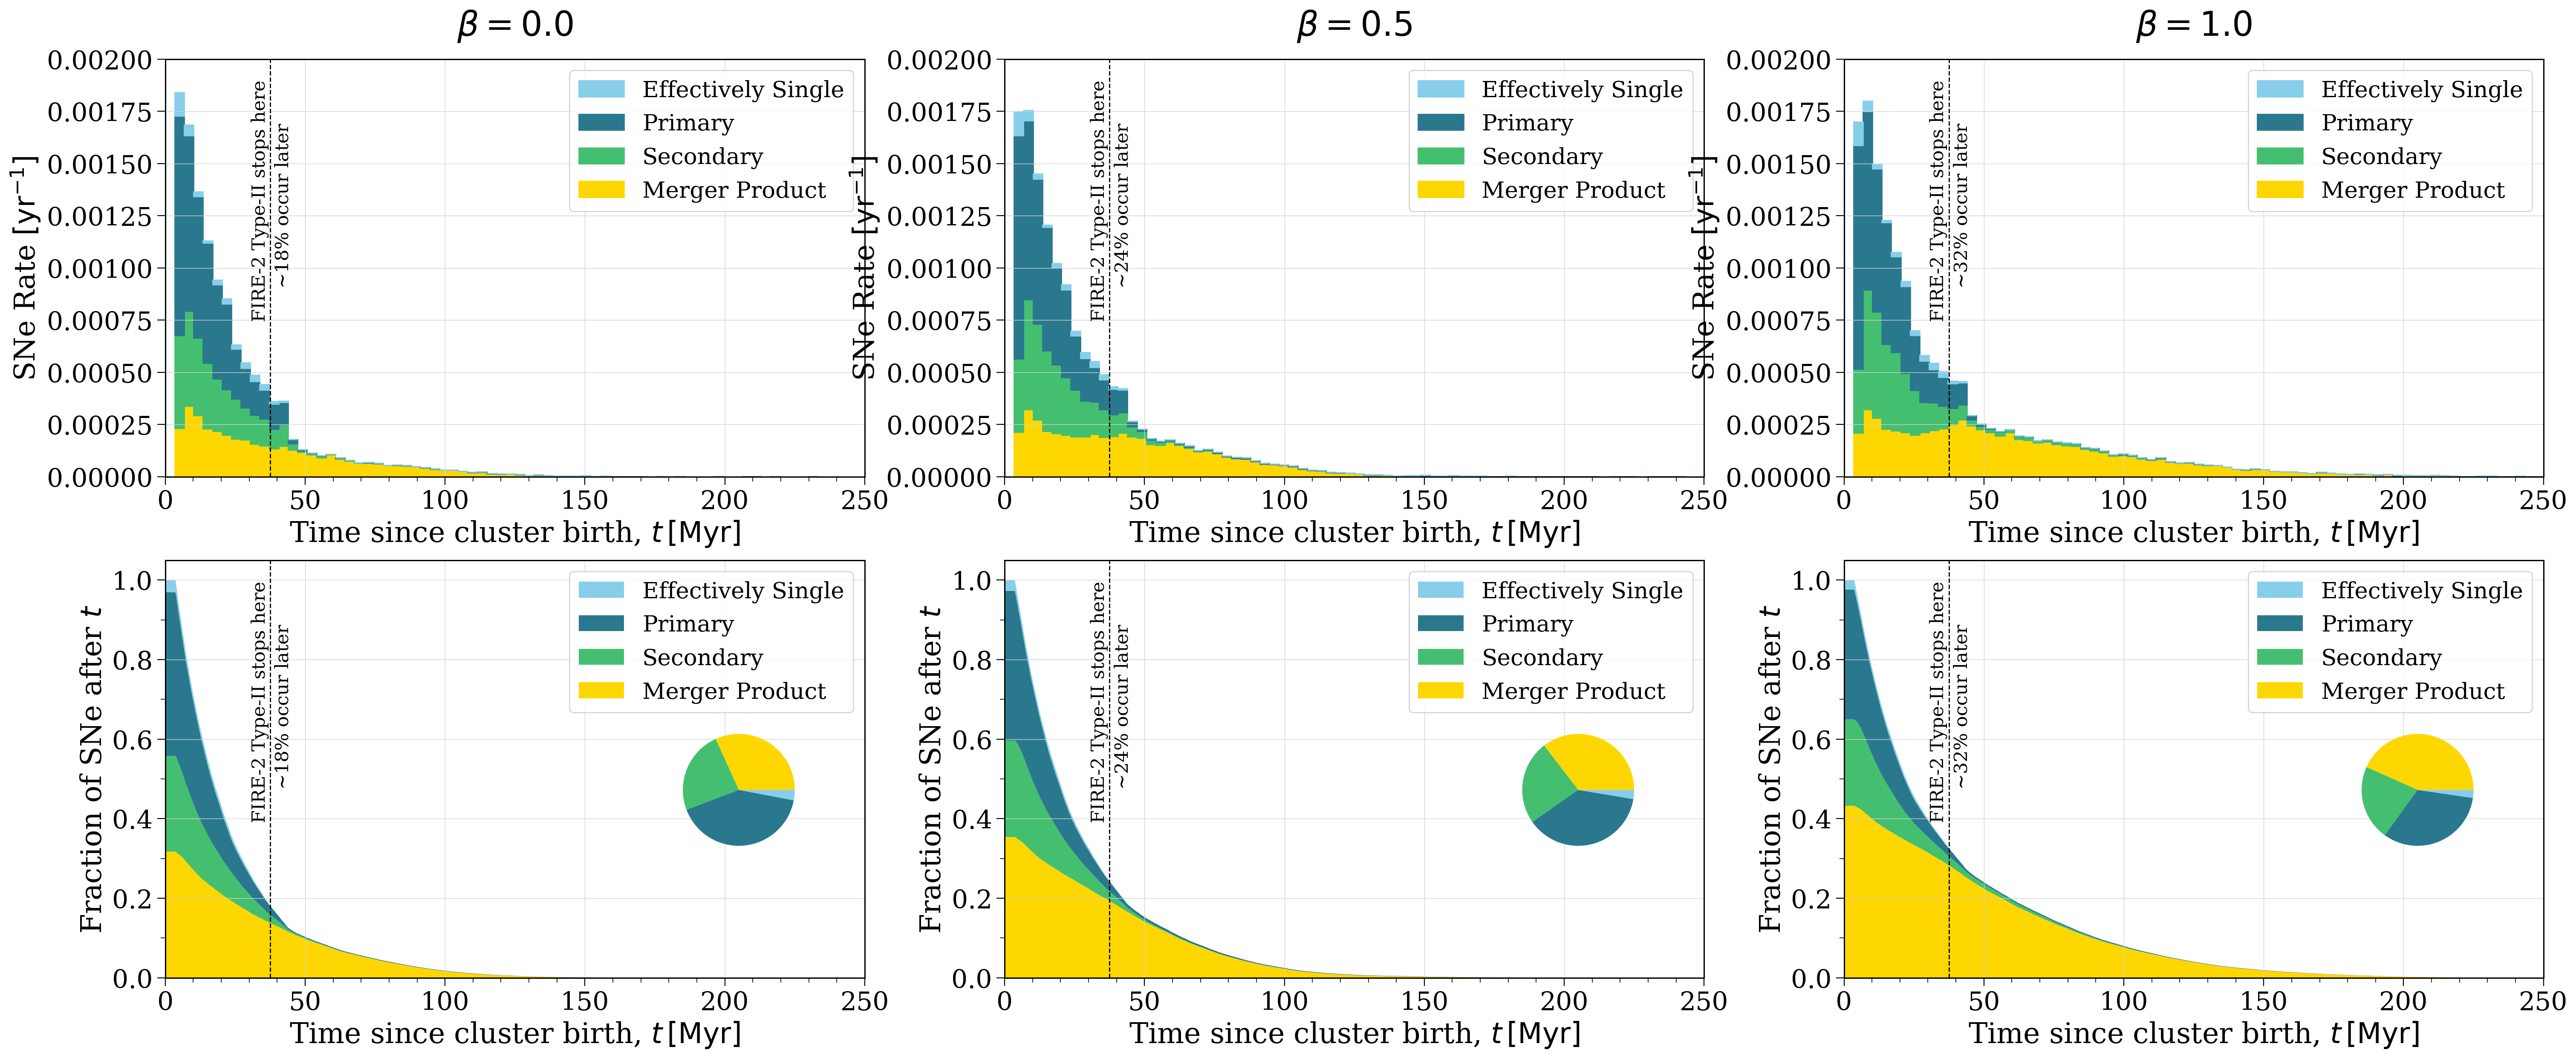

In [137]:
reload(plotting)
fig, axes = plt.subplots(2, 3, figsize=(36, 14))

for p, x, l in zip(["beta-0.0", "beta-0.5", "beta-1.0"],
                   [axes[:, 0], axes[:, 1], axes[:, 2]],
                   [r"$\beta = 0.0$", r"$\beta = 0.5$", r"$\beta = 1.0$"]):
    plotting.sandpile(pops[p], bins=np.linspace(0, 250, 75),
                      # comparison_pop=pops["fiducial"],
                      var="time",
                      top_ax_dict={"ylim": (0, 0.002)}, fig=fig, axes=x, show=False)
    x[0].set_title(l, fontsize=1.2 * fs, pad=20)
plt.show()

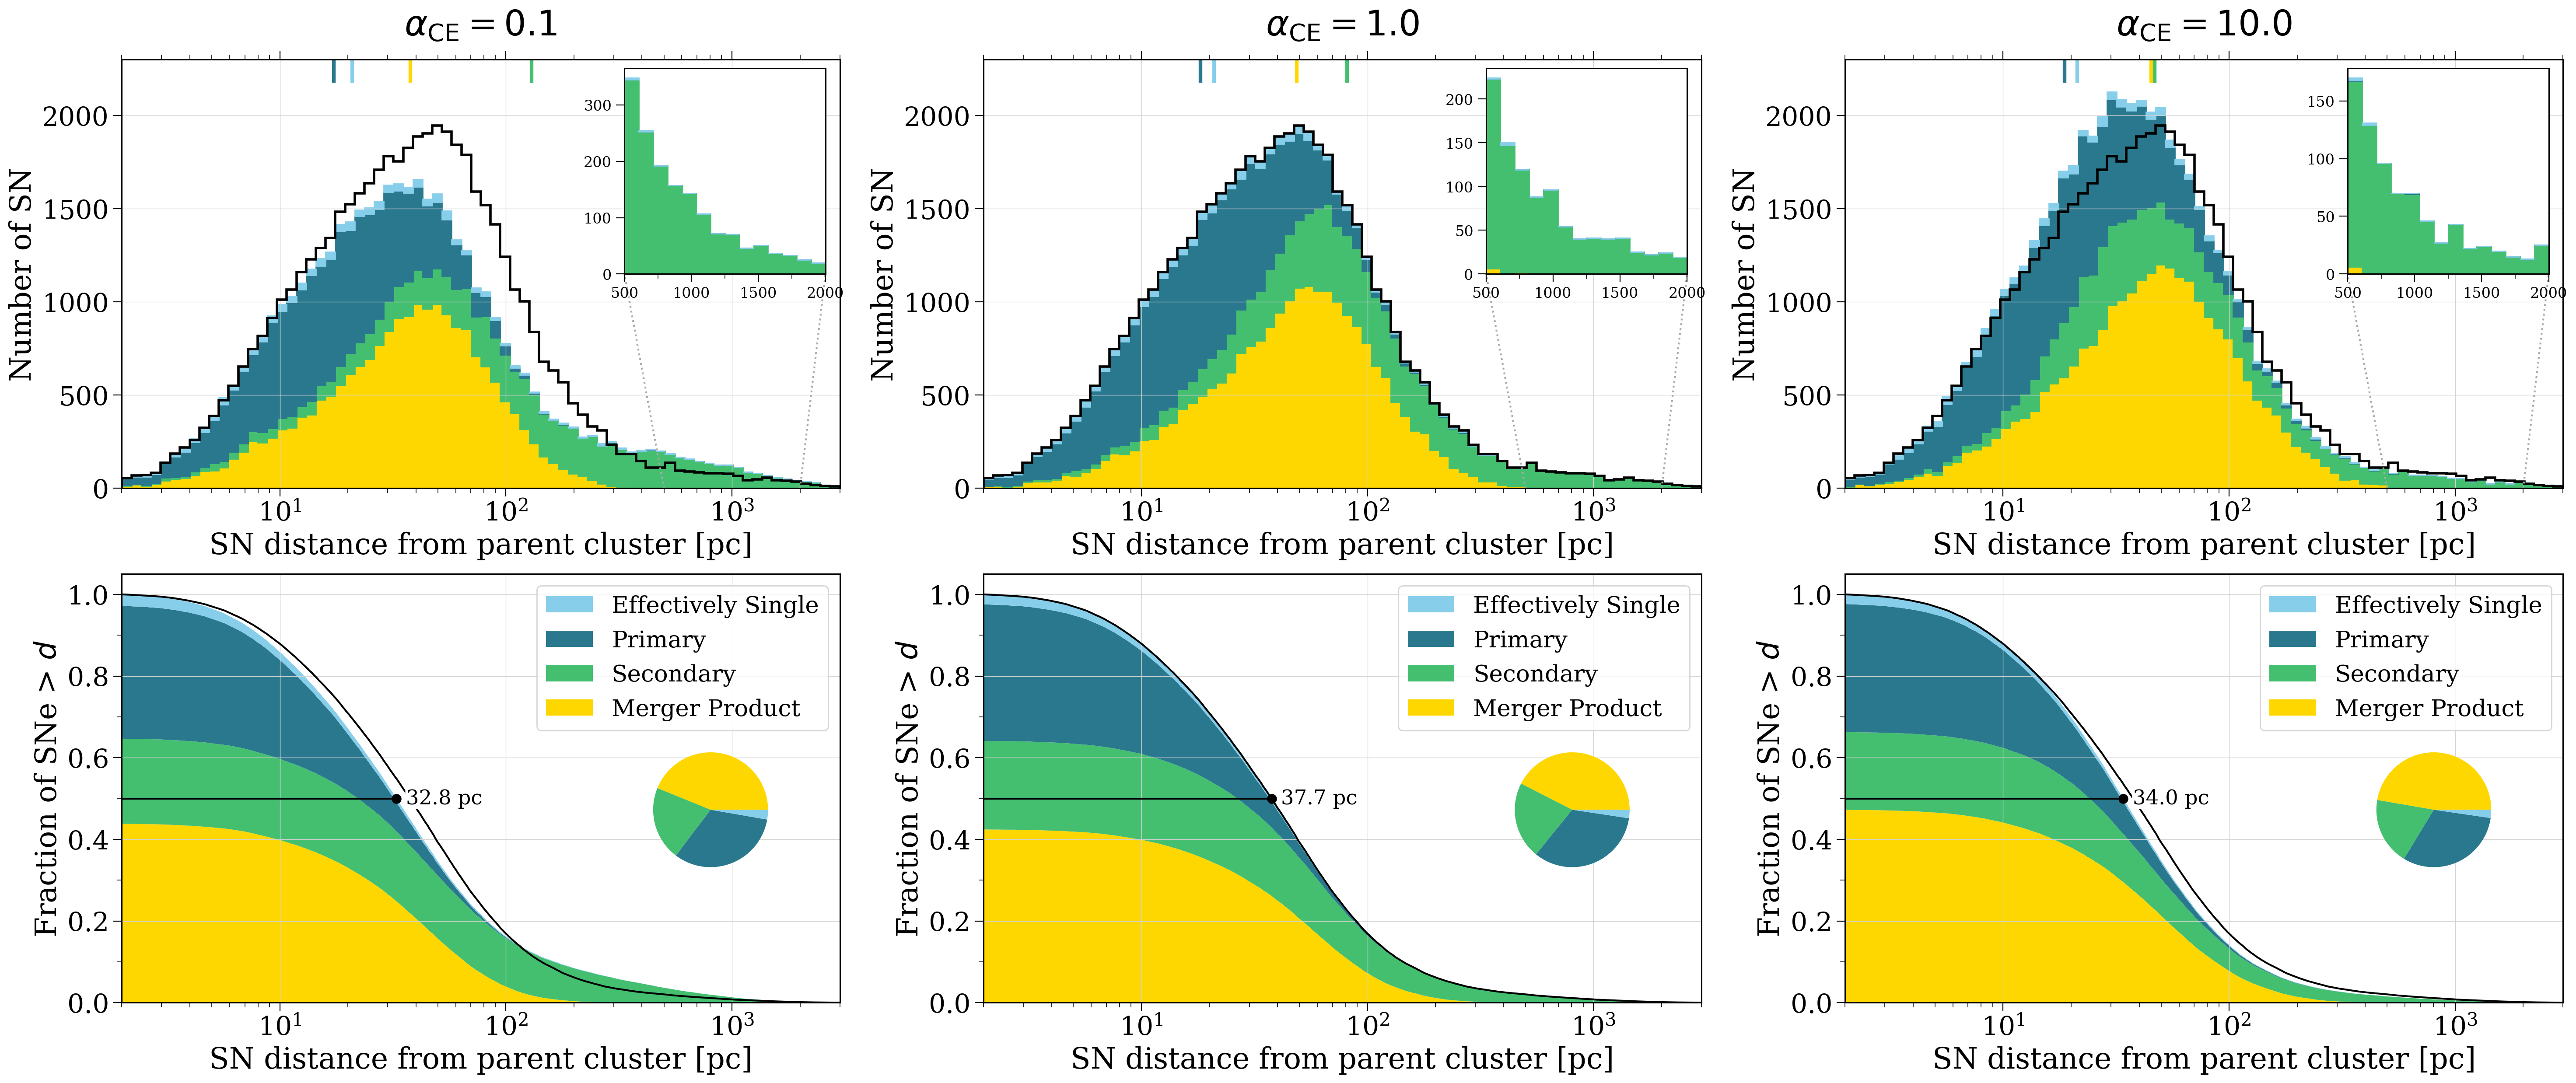

In [138]:
fig, axes = plt.subplots(2, 3, figsize=(36, 14))

for p, x, l in zip(["ce-0.1", "fiducial", "ce-10.0"],
                   [axes[:, 0], axes[:, 1], axes[:, 2]],
                   [r"$\alpha_{\rm CE} = 0.1$", r"$\alpha_{\rm CE} = 1.0$", r"$\alpha_{\rm CE} = 10.0$"]):
    plotting.sandpile(pops[p], bins=np.geomspace(2e0, 3e3, 75),
                      comparison_pop=pops["fiducial"],
                      top_ax_dict={"ylim": (0, 2300)}, fig=fig, axes=x, show=False)
    x[0].set_title(l, fontsize=1.2 * fs, pad=20)
plt.show()

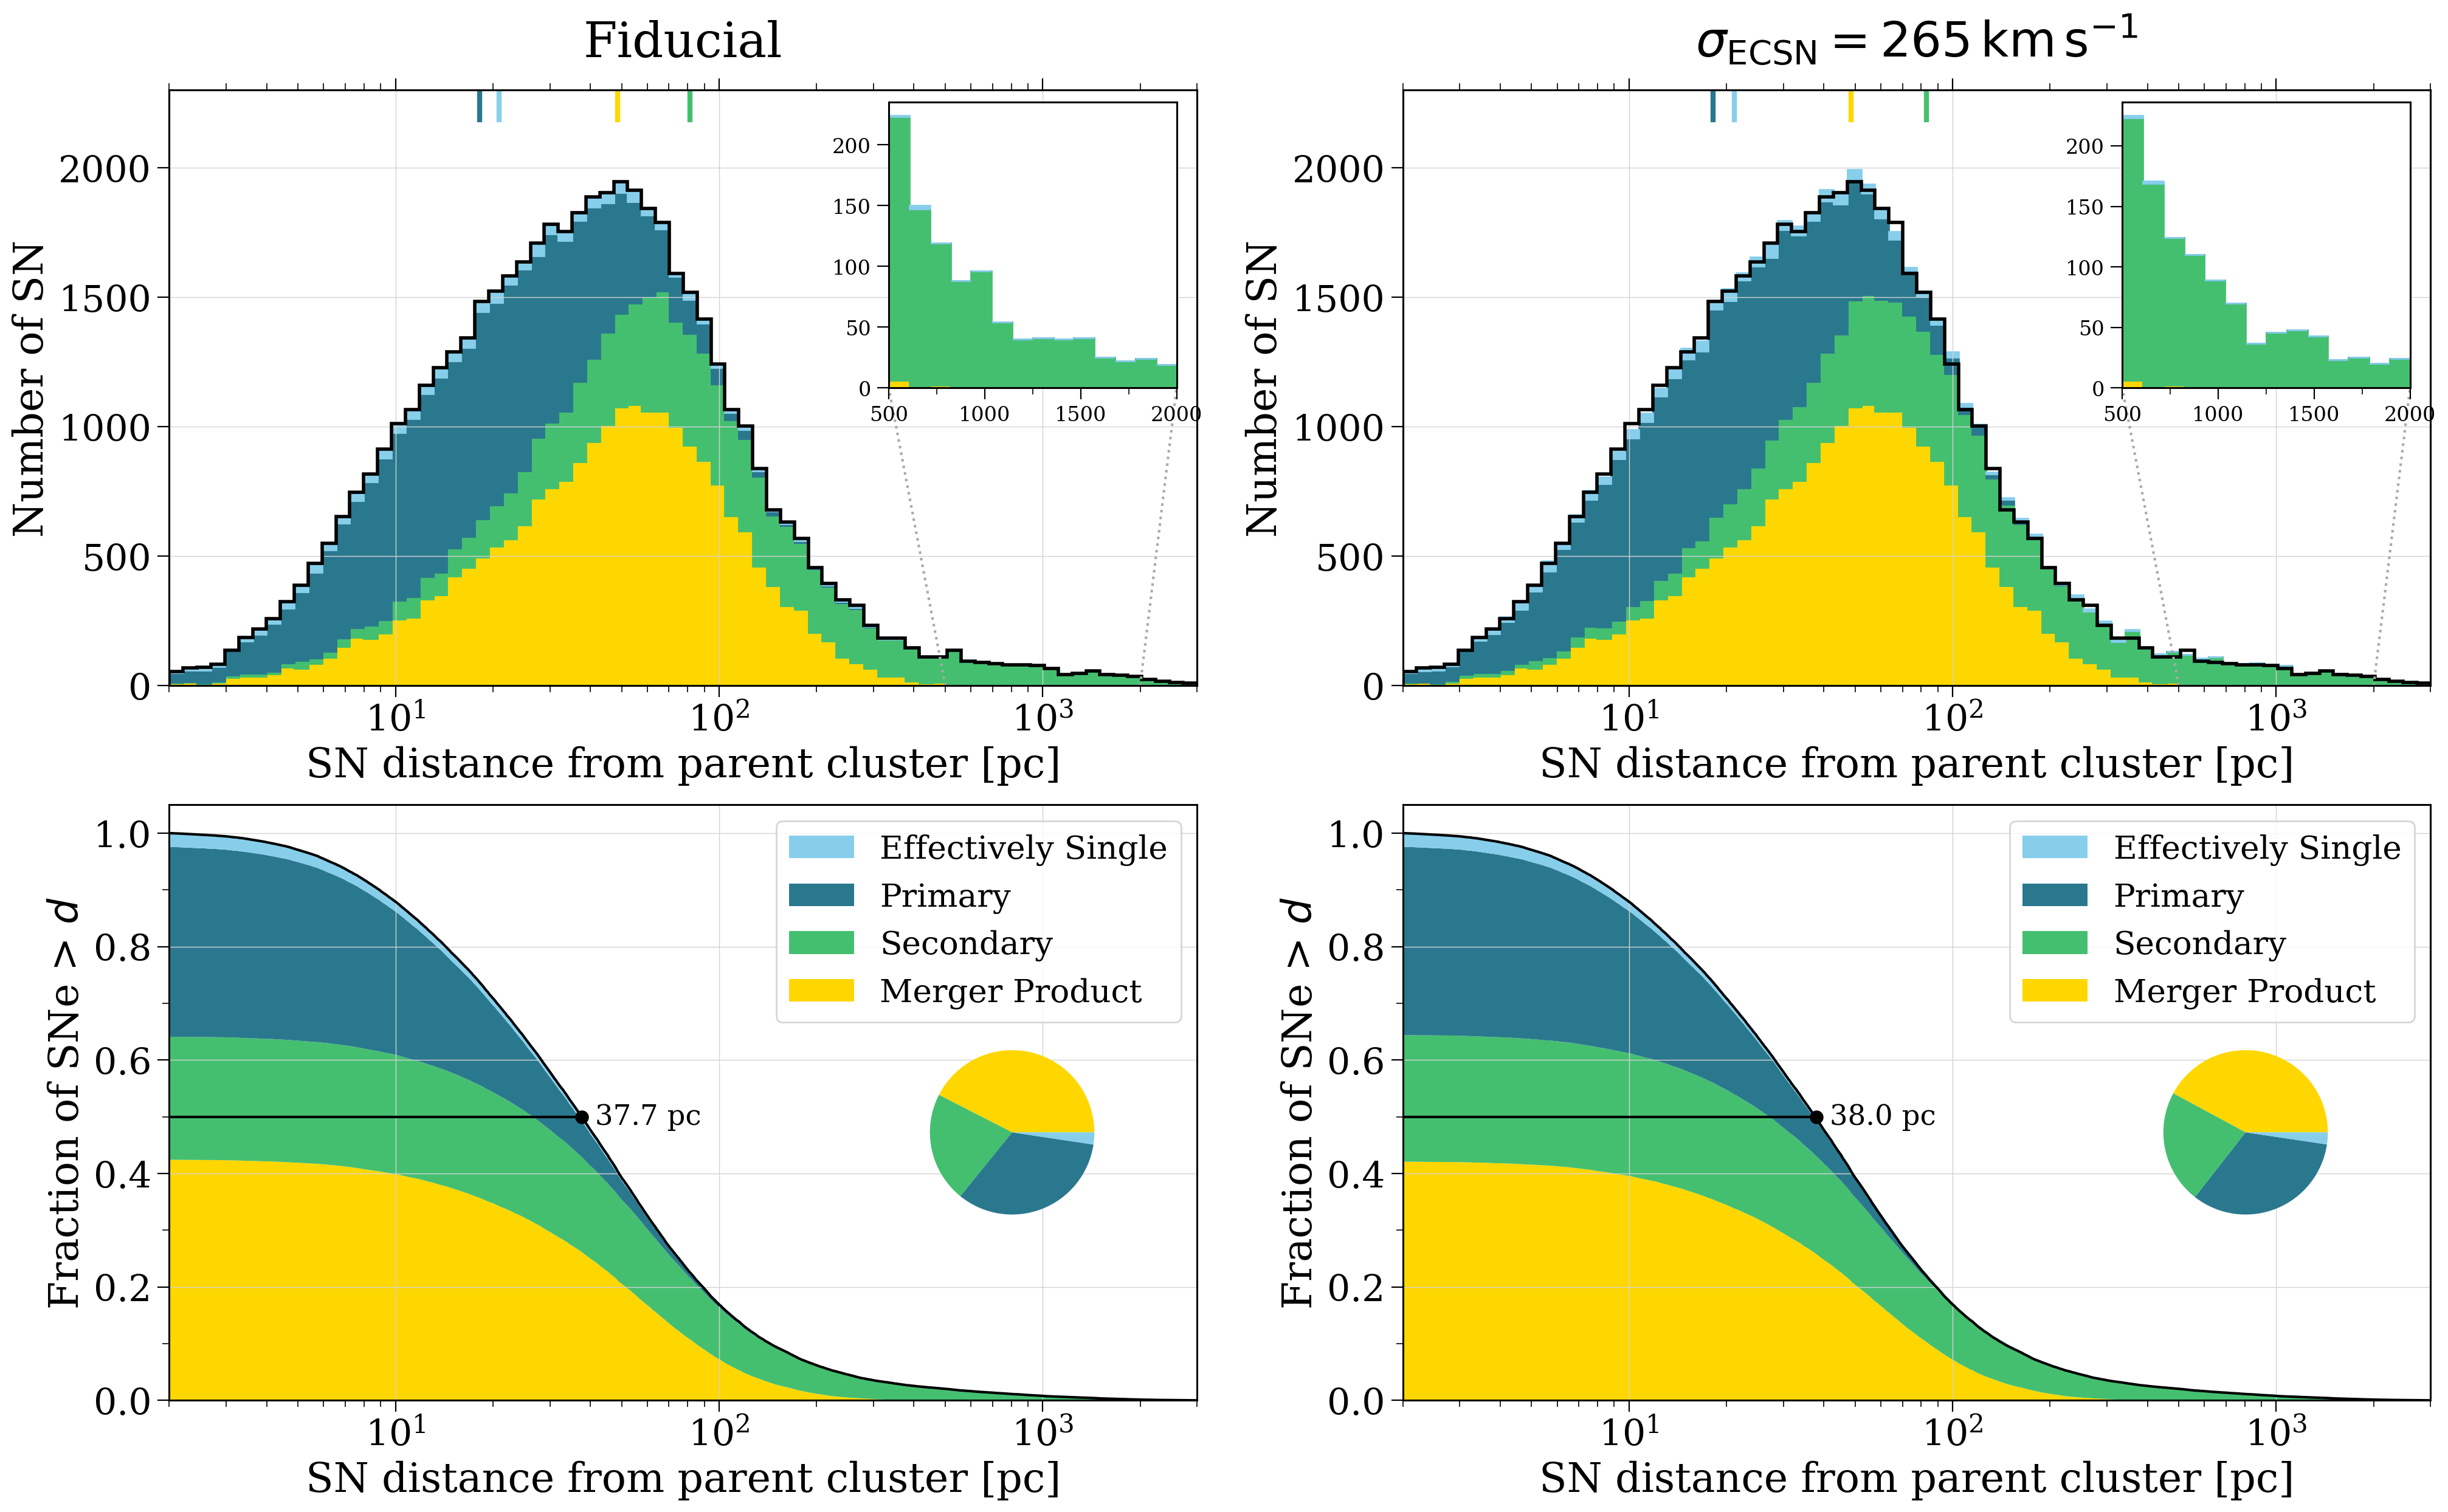

In [139]:
fig, axes = plt.subplots(2, 2, figsize=(24, 14))

for p, x, l in zip(["fiducial", "ecsn-265"],
                   [axes[:, 0], axes[:, 1]],
                   [r"Fiducial", r"$\sigma_{\rm ECSN} = 265 \, {\rm km \, s^{-1}}$"]):
    plotting.sandpile(pops[p], bins=np.geomspace(2e0, 3e3, 75),
                      comparison_pop=pops["fiducial"],
                      top_ax_dict={"ylim": (0, 2300)}, fig=fig, axes=x, show=False)
    x[0].set_title(l, fontsize=1.2 * fs, pad=20)
plt.show()

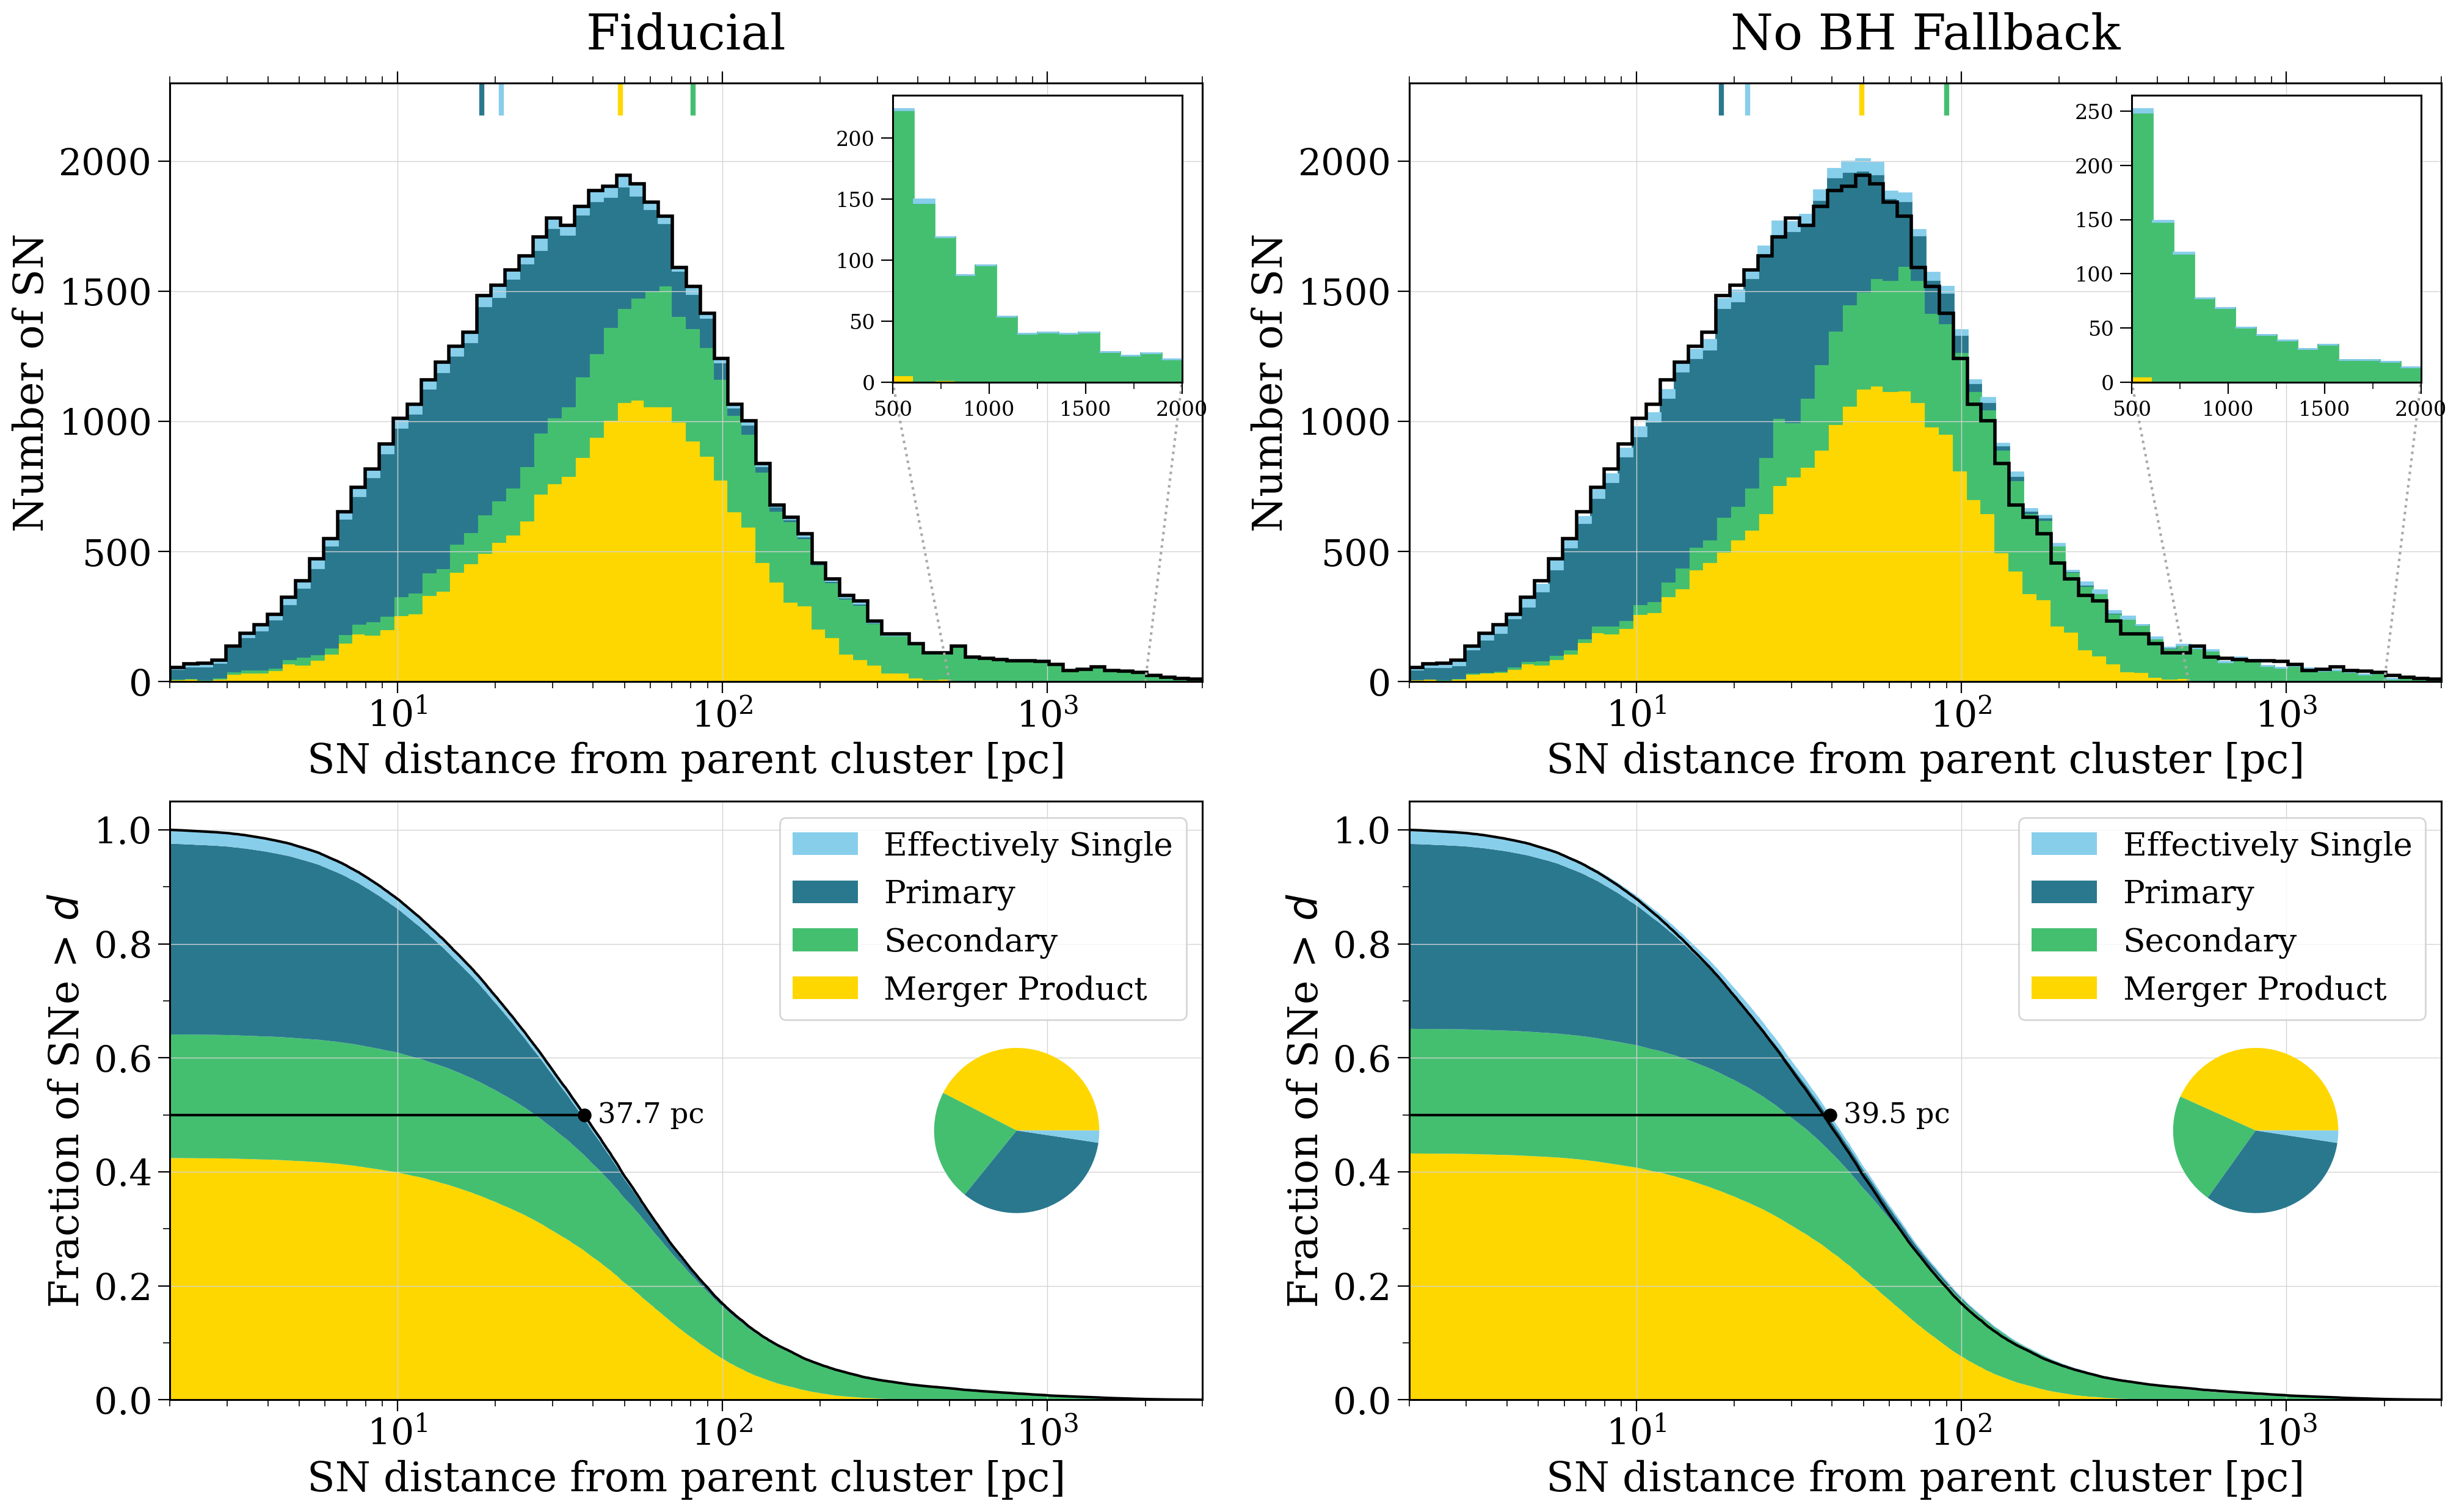

In [140]:
fig, axes = plt.subplots(2, 2, figsize=(24, 14))

for p, x, l in zip(["fiducial", "no-fallback"],
                   [axes[:, 0], axes[:, 1]],
                   [r"Fiducial", r"No BH Fallback"]):
    plotting.sandpile(pops[p], bins=np.geomspace(2e0, 3e3, 75),
                      comparison_pop=pops["fiducial"],
                      top_ax_dict={"ylim": (0, 2300)}, fig=fig, axes=x, show=False)
    x[0].set_title(l, fontsize=1.2 * fs, pad=20)
plt.show()

# Galaxy variations

In [92]:
gal_pops = {file_name: cogsworth.pop.load(f"/mnt/home/twagg/ceph/pops/feedback-variations/{file_name}.h5", parts=[])
        for file_name in ["fiducial", "alpha-vir-0.1", "alpha-vir-10.0", "r-0.1", "r-1.0", "r-10.0", "r-100.0"]}

In [93]:
for p in gal_pops:
    plotting.set_sn_subpop_masks(gal_pops[p])
    f = np.load(f"/mnt/home/twagg/ceph/pops/feedback-variations/sn_positions-{p}.npz")
    gal_pops[p].primary_sn_distances, gal_pops[p].secondary_sn_distances = f["arr_0"] * u.kpc, f["arr_1"] * u.kpc

1232 17382 11243 21970
1232 17382 11243 21970
1232 17382 11243 21970
1232 17382 11243 21970
1232 17382 11243 21970
1232 17382 11243 21970
1232 17382 11243 21970


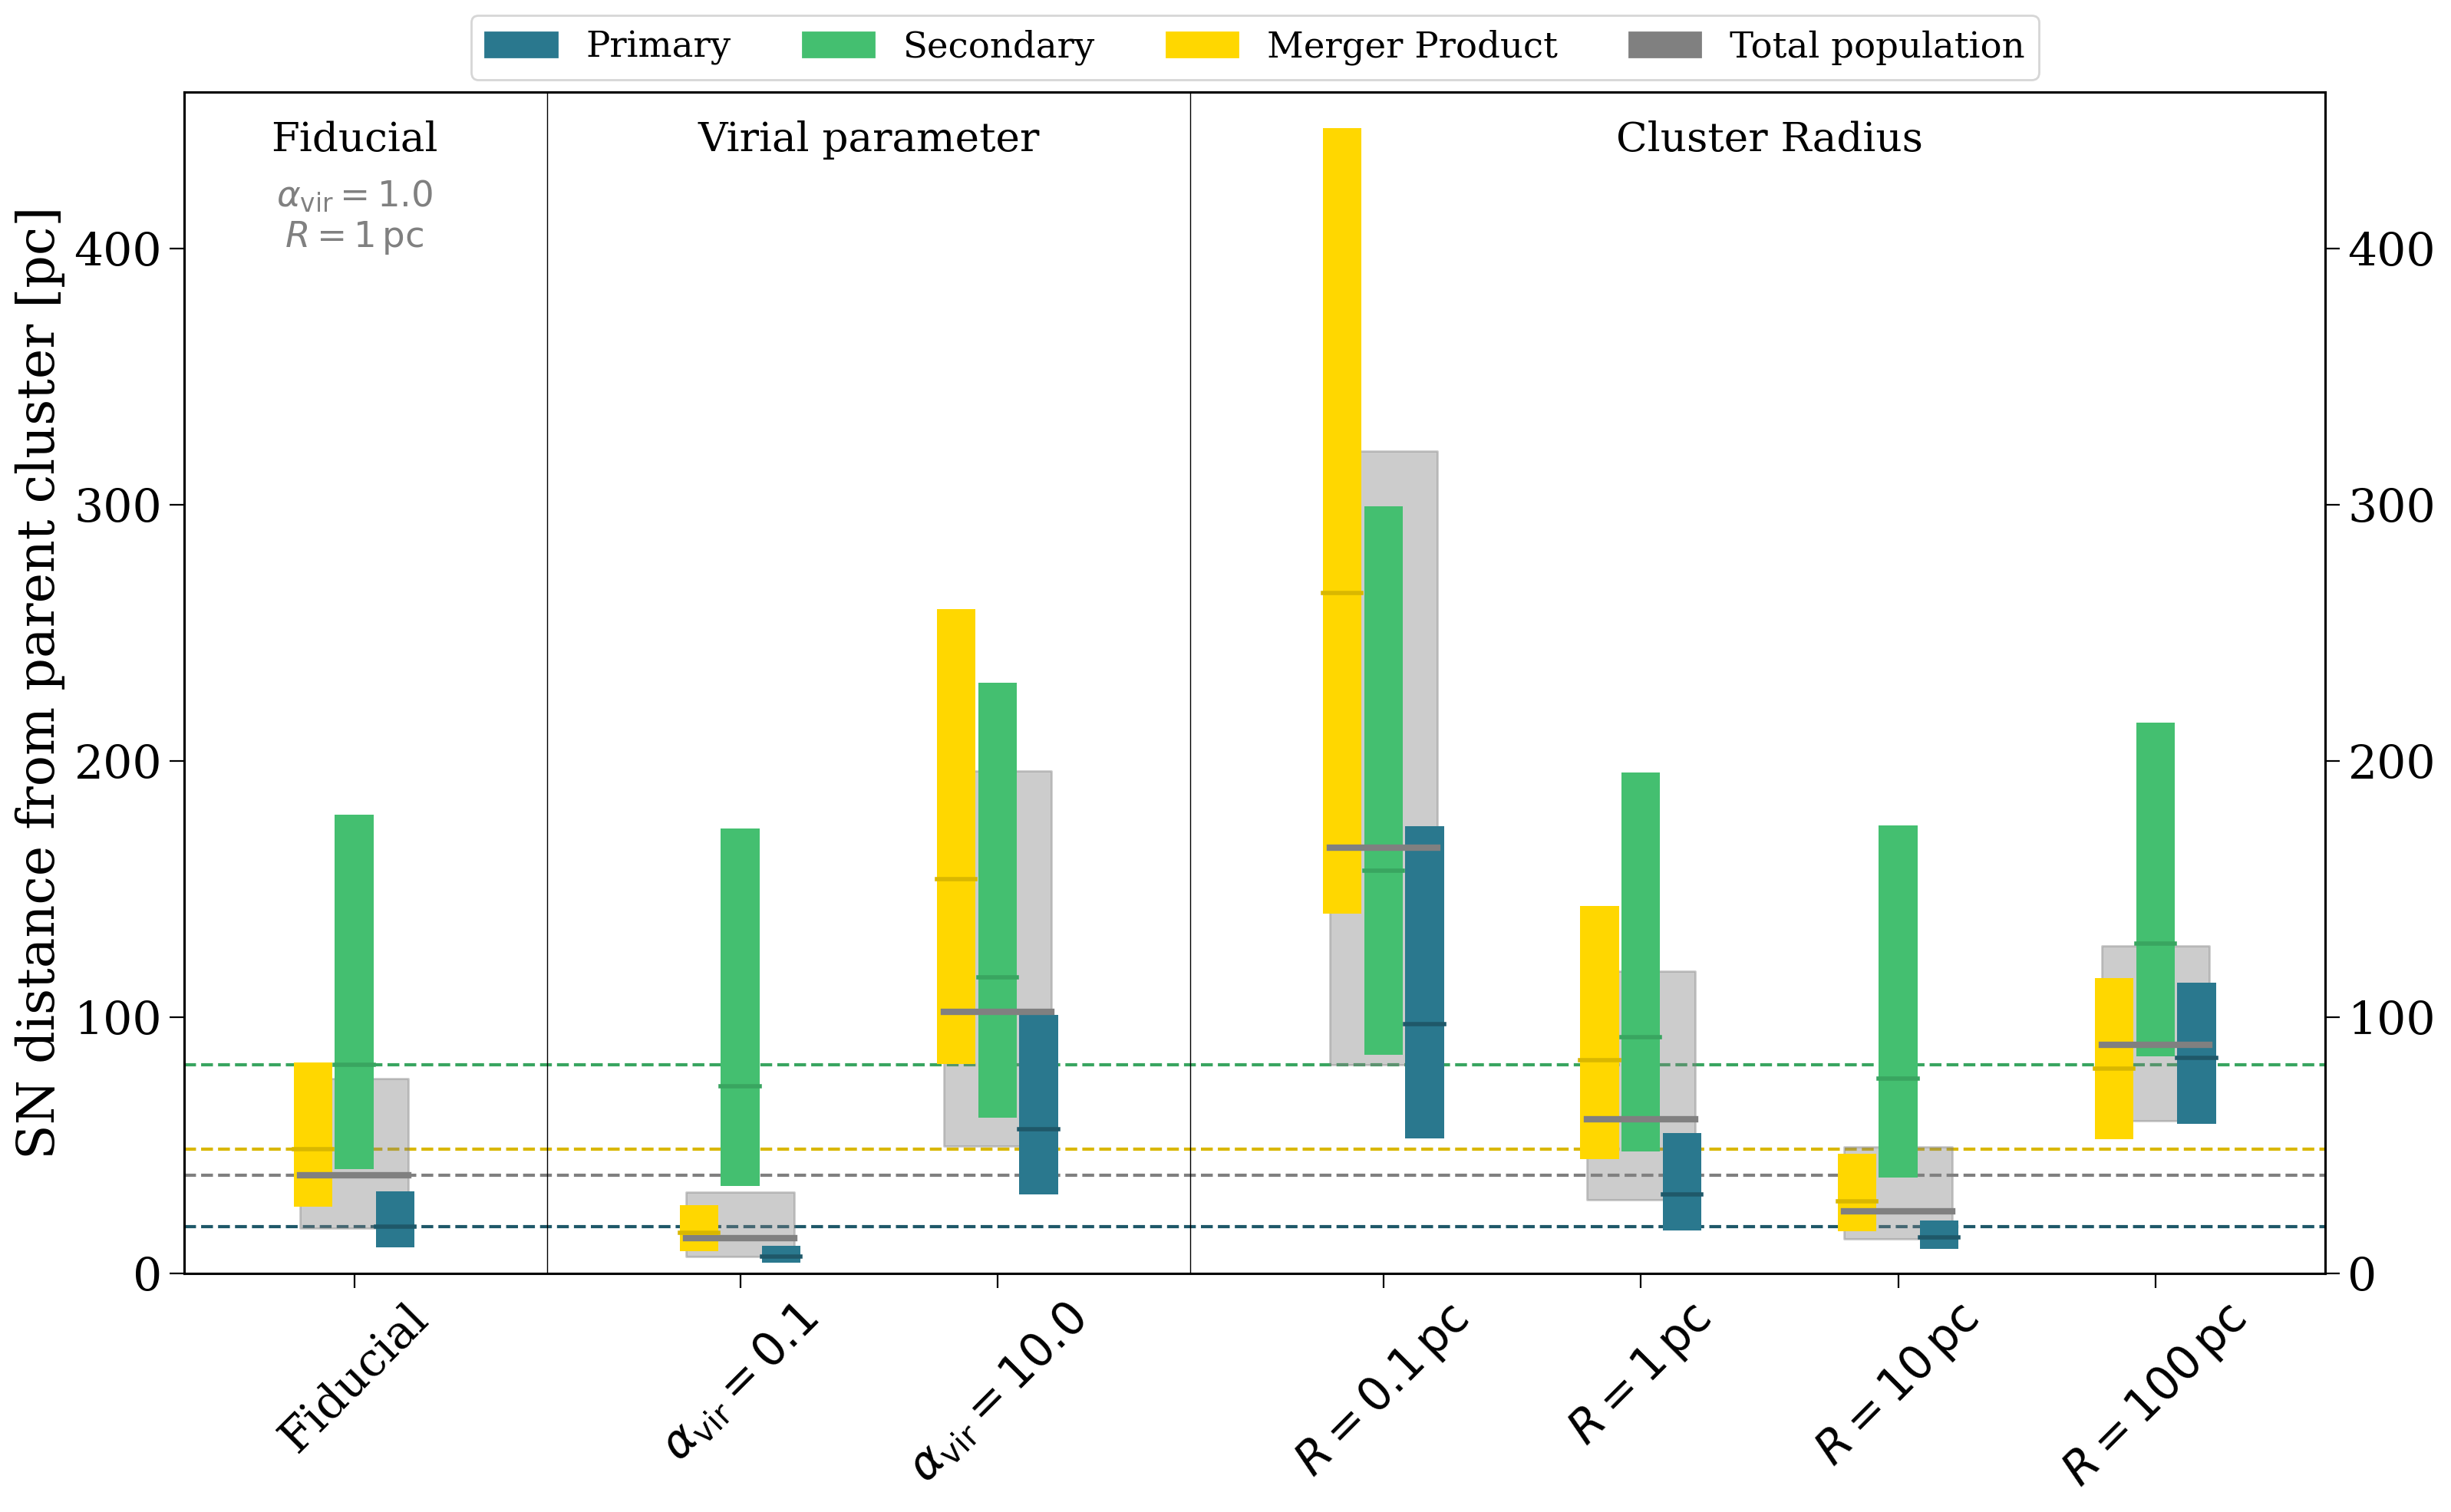

(<Figure size 1800x1000 with 2 Axes>,
 <Axes: ylabel='SN distance from parent cluster [pc]'>)

In [127]:
plotting.compare_variations(gal_pops, ["Fiducial",
                                   r"$\alpha_{\rm vir} = 0.1$", r"$\alpha_{\rm vir} = 10.0$",
                                   r"$R = 0.1 \, {\rm pc}$", r"$R = 1 \, {\rm pc}$",
                                   r"$R = 10 \, {\rm pc}$", r"$R = 100 \, {\rm pc}$"],
                        group_labels=["Fiducial", "Virial parameter", "Cluster Radius"],
                        group_start_inds=[1, 3], annotate_loc=450,
                        fiducial_settings=[r"$\alpha_{\rm vir} = 1.0$", r"$R = 1 \, {\rm pc}$"])